# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

### 目录:
[1 矩阵运算](#1-矩阵运算)  
[2 Gaussian Jordan 消元法](#2-Gaussian-Jordan-消元法)  
[3  线性回归](#3-线性回归)  

In [39]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 63

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [40]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,2,3,4],
    [2,2,3,4],
    [3,2,3,4],
    [4,2,3,4]]
I[2][3]

4

## 1.2 返回矩阵的行数和列数

In [41]:
# TODO 返回矩阵的行数和列数
def shape(M):
    row_n = len(M)
    column_n = len(M[0])
    return (row_n,column_n)

In [42]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [43]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for l in range(len(M)):
        for n in range(len(M[0])):
            M[l][n] = round(M[l][n],decPts)

In [44]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.012s

OK


## 1.4 计算矩阵的转置

In [45]:
# TODO 计算矩阵的转置
def transpose(M):
    N = list()
    for c in range(len(M[0])):
        n = list()
        for r in M:
            n.append(r[c])
        N.append(n)     
    return N

In [46]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.012s

OK


## 1.5 计算矩阵乘法 AB

In [47]:
shape(I)[0]

4

In [48]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    if shape(A)[1] != shape(B)[0]:
        raise ValueError('could not multiply matrix A with B when A has %r columns and B has %c rows' % (shape(A)[1],shape(B)[0]))
    M = list()
    #对B进行转置
    transB = transpose(B)
    for r in A:
        m = list()
        for c in transB:
            multiply_list = [x*y for x,y in zip(r,c)]
            m.append(sum(multiply_list))
        M.append(m)
    return M

matxMultiply(A,B)

[[8, 14, 24, 18], [11, 19, 30, 28], [10, 18, 34, 20]]

In [49]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.071s

OK


---

# 2 Gaussian Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [50]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):

    if len(A) != len(b):
       raise ValueError('Matrix A and b should have the same length')
    trans_A = transpose(A)
    trans_B = transpose(b)

    trans_T = trans_A + trans_B

    return transpose(trans_T)

augmentMatrix(A,B)

[[1, 2, 3, 1, 2, 3, 5], [2, 3, 3, 2, 3, 3, 5], [1, 2, 5, 1, 2, 5, 1]]

In [51]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [52]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    tmp = M[r1]
    M[r1] = M[r2]
    M[r2] = tmp

In [53]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [54]:
[x*4 for x in A[0] ]

[4, 8, 12]

In [55]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError('scale can not be zero')
    M[r] = [x*scale for x in M[r]]

In [56]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [57]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    r2_s = [x*scale for x in M[r2]]
    M[r1] = [x+y for x,y in zip(M[r1],r2_s)]
    

In [58]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 可以用[这个页面](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys)检查你的答案(注意只是答案, 推演步骤两者算法不一致)

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 分数的输入方法
(双击这个区域就能看到语法啦)  
  
示例一: $\frac{n}{m}$  

示例二: $-\frac{a}{b}$  

#### 以下开始你的尝试吧!

In [59]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  2,  1,  8 ||  1 
-10,  7,-10 ||  1 
  4,  8, -4 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    1 & 2 & -1 & \frac{1}{4} \\
    0 & 27 & -20 & \frac{7}{2} \\
    0 & -3 & 10 & \frac{1}{2}  \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{13}{27} & \frac{-1}{108}  \\
    0 & 1 & \frac{-20}{27} & \frac{7}{54} \\
    0 & 0 & \frac{70}{9} & \frac{8}{9} \end{bmatrix}$
   
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-9}{140} \\
    0 & 1 & 0 & \frac{3}{14} \\
    0 & 0 & 1 & \frac{4}{35} \end{bmatrix}$
    
$...$

In [60]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  5,  4,  0 ||  1 
  3, -2,  0 ||  1 
-10,  1,  0 ||  1 


In [61]:
Ab[0:]
abs(1)

1

### 2.3.3 实现 Gaussian Jordan 消元法

In [62]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    #如果A,b高度不同，返回None
    if(len(A)!=len(b)):
        return None
    Ab = augmentMatrix(A,b)
    #对于Ab的每一列（最后一列除外）
    width = len(A[0])
    #当前列为列c
    #寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
    #print(width)
    for n in range(width):
        #print('start:',n)
        ancor = n
        counter = n
        ancor_value = abs(Ab[n][n])
        for r in Ab[n+1:]:
            counter = counter +1 
            if abs(r[n])>ancor_value:
                ancor_value = abs(r[n])
                ancor = counter
        #如果绝对值最大值为0
        #    那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        if ancor_value < epsilon:
            return None
        if ancor != n:
           #    使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
           swapRows(Ab, n,ancor)
        scale = 1/Ab[n][n]
        #    使用第二个行变换，将列c的对角线元素缩放为1
        if scale != 1:
            scaleRow(Ab, n, scale)
        #    多次使用第三个行变换，将列c的其他元素消为0
        counter = 0
        #print('end:',n)
        
        for r in Ab:
            scale = -r[n]/Ab[n][n]
            if counter != n:
                addScaledRow(Ab, counter, n, scale) 
            counter = counter +1
    #printInMatrixFormat(Ab,padding=3,truncating=0)
    x = [[r[-1]] for r in Ab]
    print(x)
    return x

In [63]:
A = [[7, 9, 2, -5, 7], [-5, 0, -9, -1, 3], [8, 4, 9, 3, -4], [8, 7, 9, -5, -9], [4, 2, -1, -1, -9]]
b = [[0], [1], [2], [3], [4]]
#Ab= augmentMatrix(A,b)
print(gj_Solve(A,b))
#shape(gj_Solve(A,b))

[[-0.06995102001997222], [0.557468258119739], [-0.22692472300156935], [0.30957249512577845], [-0.36083503732940214]]
[[-0.06995102001997222], [0.557468258119739], [-0.22692472300156935], [0.30957249512577845], [-0.36083503732940214]]


In [64]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

[[0.17549281808970985], [-2.854128441160772], [2.827697142377559], [1.180703802116548], [-0.5853279815462029], [-0.5144308765469379], [-1.0651803026776547], [0.595330309037153]]
[[-3.092982638785181], [-0.2416355337343149], [3.4753607970296585], [-1.0602535719156352], [-0.6859186625864242], [1.0838155993723817], [-1.6272016401947795], [-1.608416685472047]]
[[0.49005841930987815], [0.5309776148829453], [-0.7487736419383556], [-0.9486831560417858], [0.180128331267436], [-0.4075341980179093], [-0.8022066945445027], [0.36631769474477943]]
[[0.0657410046255894], [-0.09173558793393063], [0.0015712025928562579], [-0.2844366473865759], [-0.20154586176043543], [-0.16696982204986033], [-0.4280953880039908]]
[[-0.5313059033989267], [-0.39534883720930236], [-1.189624329159213], [-0.821109123434705]]
[[-0.08522727272727272], [0.09090909090909091], [-0.17045454545454547]]
[[10.13751696940457], [24.049608825183732], [20.543806354067517], [-3.9066024562797383], [-30.984939202694015], [9.77132520552131

[[0.4560333387795525], [-1.4433341505265782], [-0.23195343673454744], [-1.445093872928478], [0.6766548904490287], [0.2398576356773562], [0.658449140956159], [0.16576377476489487]]
[[0.37903225806451657], [1.0645161290322587], [-1.3870967741935492]]
[[1.7332415400600851], [1.7119298239794136], [0.6740038379928391], [2.429187473312129], [-1.1040203331262424], [-0.8747186925511015], [-0.3708909817729615], [-1.991901781287892], [-0.3109825508436899]]
[[-0.3517795381010822], [0.5154524154858865], [-0.05210309048309719], [0.05087582282717835], [0.18983599241325447]]
[[3.6173165853998075], [-23.459757272641212], [-13.362707607923536], [-17.784056702167824], [-2.1807470052211855], [2.3686537245098442], [-2.7734079444835253], [12.148057320170803]]
[[-0.5455127164372965], [-1.486236195606152], [0.3864147892054336], [0.564680489365563], [0.02390480101616893], [-0.747699135046686]]
[[1.4304016278192953], [2.8980271051182065], [0.019439187692323112], [-1.86512569890504], [0.8190028358858503], [1.34

[[0.15129473731052245], [-2.1492679808894275], [1.5519331049018381], [-0.5827875384820769], [0.14474519909544345], [0.1801750049556419]]
[[-0.003412014219905002], [-1.6226833795368576], [1.128528711709399], [-0.5138011960400822], [-0.44566156197456025], [-0.8154111365746481], [1.2829348162482332], [1.6360557699005174]]
[[-0.3226485616956849], [-1.9158367240726744], [1.7864484765329305], [0.2216183289174866], [-0.8150016559424682], [0.6525123012869041]]
[[0.48275862068965525], [0.1724137931034483], [0.4137931034482759]]
[[-1.9872578845400248], [0.87923201377424], [0.2711416943006589], [-4.348325907436241], [1.4135797912774728], [3.1854813350561684], [-3.3109527391881253], [-2.3083455174704044]]
[[-0.6403731976251057], [0.5996607294317216], [-0.5623409669211193], [-0.2892281594571671]]
[[-0.125], [0.3125], [-0.4375]]
[[-0.11553523984498884], [-0.2589966123093824], [-0.48843369227732114], [0.4369294592195925], [-0.2615883851253854], [-0.29560697584835094], [0.12877656797356823], [-0.94386

[[0.5840070483849228], [-0.08379403194368662], [-0.6925033202234205], [-0.1485436694822104], [-0.1194055581937421], [-0.5448541549476957], [-0.6327508762656442], [-0.9282345251788194]]
[[1.768608165527204], [0.7989866302843971], [-0.5133003847848658], [1.280572503767641], [-0.40619552027437256], [-0.056412769772176574], [-0.10689098693069896], [-1.4554412503178802], [1.033586038628145]]
[[0.791394779771615], [-0.24592169657422505], [0.6107259380097877], [1.0550570962479606]]
[[0.07041675808190165], [0.03773620901815272], [-0.6575791973901347], [0.2121946333692635], [-0.3360487632711074]]
[[-16.29791479187332], [9.309743232680201], [3.2720426434750642], [7.6612382503826275], [5.116822890323771], [3.815009623026953], [5.101406341344863]]
[[-2.117020241339045], [0.1114750173820277], [1.6393129538348512], [-0.5481999197946618], [-1.7417703352902676], [-1.536173112379117], [-0.478981829371129], [-2.014694013268353]]
[[0.5319059613769939], [0.6046739434648752], [-0.8560733277357961], [-0.768

[[-0.9697869662641865], [-1.0596706132194629], [0.2293560254288684], [-0.7824203856009813], [-1.2282985020890278], [0.9681421725696089], [2.205129250590679], [0.13748359793992138], [0.2811096080182184]]
[[-0.062097081700186726], [-0.3075668766303419], [-0.3998583340890359], [0.504235657786786], [0.2502615227342989], [-0.12887634200560716], [1.0768444735112734], [0.4681612284756536], [-0.5412007385171346]]
[[0.24243708321671067], [-1.565249608502727], [0.878672157401301], [-4.240976399211027], [5.14503951926683], [0.9807722738961984], [3.59785012328533], [3.648799630061778]]
[[-0.12412831241283118], [-0.101813110181311], [-0.2733612273361227]]
[[-0.8198030812699356], [-0.4438765979995062], [0.4557268905209433], [0.41804765195404425], [0.7433447014955886], [0.7628226696589906], [-0.4043396908227828], [0.12600763115384248], [-0.12012773129131418]]
[[13.84849274154336], [10.493314579426256], [6.538323956379795], [14.540511912203911], [-3.648833090227125], [7.99326248523997]]
[[0.5689408316

[[-24.459727189845037], [-18.15208815484959], [-1.5579107931832559], [6.027131986815352], [9.449768567220714], [19.942010309278373]]
[[-0.21289174241942668], [-0.2936876231644524], [-0.37619986014875095], [-0.21931218612929881], [0.23723857351725894]]
[[-0.3785874231963573], [-0.2286112960497229], [-0.9119149377169071], [0.4340679014673441], [0.05226677186113608], [1.7602116302758497], [-1.6565785368477184], [-0.3378978988243696]]
[[-0.5464275797287025], [0.7279305524482291], [-0.5104433136421406], [-0.7638640435015096], [-0.2215546363158904], [-0.32314373618562087], [-0.33315276462122606]]
[[-3.478905612780619], [4.901494799701794], [-5.231290410467907], [5.425127211308272], [5.321132367766313], [3.137620458854616], [-3.8170210163303464]]
[[0.2756218905472637], [0.05060412224591326], [-0.3012082444918266], [0.2243070362473348]]
[[-0.4570421333418606], [0.10045775277691063], [-0.9791538735219331], [0.9820912285462887], [-0.8084865424474976], [0.5705640656581565], [0.9755257675734059], 

[[0.5775879197297848], [-0.8952645870587455], [0.3480627856149414], [-0.992184912908142], [-0.7041128551559708], [-0.5723690310616621], [-0.010609974170474027]]
[[2.873911251216331], [1.429048619300117], [1.5053617948567402], [0.24430333461619286], [1.7908808656302222], [-0.9316357665771205], [0.7769262203941353], [-3.1327988208002715]]
[[-1.0417508417508419], [-0.6303030303030303], [-0.973063973063973], [0.059259259259259275]]
[[-0.09788867562380038], [-0.04414587332053743], [-0.18809980806142035]]
[[-0.7549504571070205], [-0.6695861983718239], [-1.2677931895277872], [0.1825561269234769], [-3.8876284150938196], [2.9531226813205387], [-0.8603588692068305], [0.992101446415697]]
[[14.147164317303504], [-4.763204090625766], [25.41399630385455], [23.417437605106755], [-4.675123486411929], [22.211178957264146], [11.065102686650139], [22.672943395575988], [2.766868231009939]]
[[-0.10108591256932177], [-0.02754283235740615], [-0.07107228057130455], [-1.4112680856337332], [-0.16448244880255297

[[-0.31607714201146203], [-0.34958198164732995], [0.16123195853519479], [-0.1794554509683623], [-0.7774134094903404], [0.43106684850299837], [-0.12512294299389287], [-0.12505863247809773]]
[[0.6715975435621411], [-1.0875225475379915], [-0.2782229691057271], [-0.5824619487706328], [0.941704504574992], [-0.004479826916551355], [-0.4053442236205499]]
[[3.153846153846154], [-0.2426035502958585], [-1.3491124260355034], [3.2426035502958586]]
[[-1.1901951003222448], [1.0334861247623741], [-0.2971121092817035], [0.4284493564582142], [-1.5286581845915836], [-0.5022321391287197], [-0.4299501995639265], [0.6722525945386182], [0.9203136021085551]]
[[2.1536267698668023], [0.4541738549292056], [-0.01888375996642894], [1.0802132388368224], [2.2524051537899616], [3.744354299746661]]
[[-31.499999999997133], [96.4999999999912], [-280.24999999997453], [-143.74999999998693]]
[[-1.3400925801448293], [0.10752058172595559], [-1.66882232196782], [-0.6323239943898117], [-0.22540676874426901], [0.40254705756061

[[0.44839857651245557], [-0.2752075919335707], [-0.44721233689205225], [-0.21470937129300124]]
[[0.12857142857142856], [0.1205357142857143], [-0.10535714285714283]]
[[-6.847303042507036], [9.131071486515102], [-1.222733100609225], [-9.855093683868029], [-0.41519856554831147], [-4.64935176028459], [2.1533683067873444], [-4.66651683937881]]
[[-0.8601925056811066], [-0.14435026263474643], [0.04536545345556903], [-0.48617569265469374], [-0.5915868828252792], [-0.01572315994811635], [1.2493630980401456]]
[[-0.34426375188838526], [0.3974495690038212], [-0.2288945170176841], [-0.33457744601439615], [0.09528570159068715]]
[[-0.945456598339178], [-0.5292731665125712], [-0.4961121076424249], [-0.6980843875025031], [-0.861375866520667], [0.7478344972156304], [-0.46501749018972927]]
[[0.10057992026096414], [0.4579557810801015], [0.058354476259514336], [0.18829285973178686], [-0.25280898876404495]]
[[0.11044613229504074], [-0.6955840350461996], [-0.8185282258480456], [0.25743713467139917], [0.46829

[[0.9416371992781714], [-0.9943228053266844], [-0.08953272161858083], [1.0099248555770877], [-2.0112580479352036], [-0.5098415662672093], [-0.3451507123348747]]
[[-0.6718682522953496], [-0.09031935359427967], [-1.3160098021584286], [-1.2117006676242568], [1.0052323723285401], [-0.011862044894495657], [-0.12901384570364144], [0.07668751539010117]]
[[0.8288303966604755], [2.3079289921019748], [-0.3052959884971632], [0.5634105052002852], [1.687433836451174], [1.7500992401950777], [-0.7907576076081253], [0.46983565758054807]]
[[-0.8412698412698415], [-0.5873015873015877], [-1.9047619047619053]]
[[-0.6093830657509076], [-0.027374885165580398], [-1.4954495494116098], [0.12725594951660169], [0.32901647053676886], [-0.6279362067457016], [1.4723013911369696]]
[[0.25], [-0.031818181818181836], [-0.01818181818181819]]
[[0.024744486282947863], [-0.17805271651425492], [0.3076923076923077], [-0.03765465303926836]]
[[-1.4421217086461144], [-0.6551994817665658], [-0.6939412414739166], [0.5857066646343

[[0.05709342560553621], [0.682698961937716], [0.14394463667820068], [-1.903460207612456], [-0.9463667820069201]]
[[0.005157304079188062], [0.5550905308045462], [0.23227241203409166], [-0.2827083010930183], [-0.2392122473075755], [-0.012180820881407239]]
[[0.7828947368421049], [0.5328947368421051], [0.15789473684210514], [1.1052631578947365]]
[[-0.3761467889908257], [0.6972477064220184], [0.2660550458715596]]
[[0.06215957698417729], [-0.7425873509673648], [-0.6264236981512246], [0.006114445621969056], [0.7753328444939642], [-0.3361912529380945]]
[[0.10136024572180785], [-0.09741114523913985], [-0.2465993856954805], [-0.24616059675296184]]
[[0.07864414790700115], [0.6577840787269108], [-0.44505425799211507], [-0.34923739937712045], [-0.32309205939972624], [0.9496410245583187], [0.48025649059257497], [0.42945287041203767], [-0.027639623206719907]]
[[-19.630165610012934], [31.590324106206424], [133.2436255043193], [70.09839059045015], [-20.574643857655158], [-14.49629748538997], [-33.43390

[[0.07037037037037033], [0.06296296296296294], [-0.14444444444444446]]
[[-0.07028050984857975], [-0.2398827022312551], [0.2640118767757131], [0.002146776514059423], [-0.027687505121562733], [-0.05182005790019456], [0.5502584235013708], [0.7994963691971696]]
[[-3.5180372421248016], [-1.111370303518558], [-7.510892879602155], [-1.1290310792941813], [-0.1055295513336936], [2.830129545215054], [1.0917379658239939]]
[[0.08200017270546849], [-1.438484779245454], [0.18931375528391037], [1.2784493141687163], [-0.06606184829906005], [1.0724536719233588], [-1.051147133950349], [0.9365826802827435], [-0.18295319356019996]]
[[-1.0888431195197246], [0.6181317113967815], [-0.5119500803708669], [-1.4932051235972263], [1.9190625347323904], [-1.8323843812264378], [2.4560138284114204], [-1.9481212181843193]]
[[-1.2100718769313348], [-0.4527662564894973], [-0.9846344496854613], [-0.3178256708384586], [0.4560257710828822], [-0.15686407768977384], [-0.4682861430239074], [0.27334702341534994]]
[[0.628970329

[[-1.0532725299945236], [-0.3466424866136038], [0.171931964749854], [0.7497838625456887], [-0.6737456900212901], [-0.5528771185960901], [-1.045086267437003], [1.0385797749042887]]
[[-0.4429259815151278], [0.8653922110751248], [0.45714511414803716], [0.4353687758380073], [-0.21096979750901865]]
[[-0.8269507117209266], [-0.1275623007321653], [0.38538707595238475], [-0.5877164417861359], [-0.06829912258996668], [-1.50424027301619], [-0.1320822226267322], [1.151780754027096], [-0.4865053625894048]]
[[-1.4860061427574285], [-0.0803868534869056], [-0.7983678885404781], [-0.09706249986820376], [2.8274878642056263], [-2.657157878144393], [0.2213285268136741]]
[[-0.2195121951219512], [-0.7073170731707319], [-0.3170731707317074]]
[[-2.0361169563912918], [-2.3098408156478216], [0.26796053968284095], [-0.9144853942867452], [-1.2655931051286988], [-1.362924642559658], [1.536707918274314]]
[[0.8737864077669906], [0.09796999117387466], [0.32303618711385707], [-0.5092674315975287]]
[[-0.08975555664727

[[1.5765553757905573], [-0.34389248418885127], [-0.9087917340785407], [1.4213119576408295], [0.5684291807618767], [0.1412340050007354]]
[[0.19772117721481758], [-0.3480226803630941], [0.6400937958094751], [-0.08644873896580485], [0.3521640525677833], [1.478766822407867], [1.190758612842293]]
[[-2.195257904554449], [-0.1763372883345815], [3.043049308925036], [-2.5738558554538025], [2.352531332454192], [-4.368073554341344], [0.6496271136926133], [3.6417384364814547], [1.5915237506983773]]
[[-0.5098990931153403], [0.015838548984544454], [-0.7239323881296037], [-0.515944990846], [-0.42189296206412075]]
[[-0.09867390140495183], [0.5878268334719685], [-0.24198675857914642], [0.4583358283773354], [-0.5211386056725735], [-0.5287162272326], [1.3765098474693125]]
[[0.21949747459729024], [-0.36531662800917214], [-0.03861564317920993], [0.19892419826999458], [-0.6871518347441669], [0.04850579421877726]]
[[-1.1019151846785233], [2.3365253077975394], [1.5444596443228464], [0.49658002735978135]]
[[0.

[[0.2708720503864695], [-0.1733307566172419], [0.6930436423542382], [-0.3589205640432516], [0.10716564634817316], [0.14660875769499387], [-0.02822119869057327], [0.018769489776448704]]
[[0.5253731343283581], [-0.435820895522388], [-0.2835820895522388]]
[[-0.11206896551724135], [-0.06034482758620685], [-0.3362068965517242]]
[[0.3537759918685694], [-2.0341967480462593], [-0.656240883324072], [-0.8528178066785352], [-2.6455054980965134], [-0.710327061232105], [1.4271908113184386]]
[[0.891142905261807], [-0.004232462647665164], [0.5430083165585327], [1.0582399692038718], [-1.5584424697853085], [-0.4415996342959797]]
[[0.47671232876712333], [-0.7041095890410959], [-0.07123287671232878]]
[[76.59935284805276], [0.9450616408056312], [-27.55504269366559], [31.07369352375066], [33.41845078612543], [15.002882413659748], [-60.53938695846923], [-63.72573945317597]]
[[-0.35340227726769374], [-0.840477930583754], [0.38185360448621597], [0.06334916982527365], [-0.7761274263224043], [0.4485888763903203

[[-1.774129572498897], [-5.0526663728514745], [-4.496364037020713], [-1.2938519171441156], [2.109409431467606]]
[[0.7000000000000001], [-0.3], [0.19999999999999996]]
[[0.4690265486725663], [0.36283185840707965], [0.8053097345132741]]
[[-0.16963617966653474], [-0.21798425058290444], [-0.19523998064317452], [-0.0702564779376182]]
[[-1.0421552205471805], [-1.5291935869825313], [1.498963069314828], [0.5384461992502193], [-0.12395309882747062]]
[[0.1863459570267545], [-0.5209169099917293], [-0.536519206663712], [0.5300353778258009], [-0.250677805346035], [1.0832061539834423], [-0.21840420507011016], [-0.8697933470018819], [0.41255814993844364]]
[[0.3060897435897436], [-0.0048076923076922976], [-0.2371794871794872]]
[[-1.1648252635205671], [-1.1158826303761518], [0.5088505725486453], [-0.5585562160375356], [-0.23199813121854854], [0.9241874117595072], [-0.2278418539656539], [-0.8206395631408238]]
[[-0.9312169312169319], [-1.7671957671957679], [-2.027630805408584], [-3.194591416813641], [0.18

[[-0.693805018719964], [-0.10966530046269138], [0.05676277437226887], [-0.8291784467449839], [0.31883023286321044], [-0.1056058440873679], [0.2389246400920369], [0.2818244915687527]]
[[-0.19723183391003468], [-0.4878892733564014], [-0.2249134948096886]]
[[0.49578411456373994], [0.1665324906578386], [-0.6840004514333009], [-0.6912371780402778], [-0.4094562736688987], [-0.1466129962631355]]
[[0.8726837737792339], [-0.40557611263090587], [-0.3658907661819267], [0.2970410428054283], [0.499610308802288], [0.8144658827611098], [0.09519331508154154], [0.13150340411262834]]
[[-0.6180119466993406], [0.6075202940725989], [-2.1778986062184096], [2.04265584316128], [1.324322254556593]]
[[0.18888888888888888], [-1.0555555555555554], [0.4444444444444444]]
[[-0.7829281034803037], [-0.36896068158348033], [3.345957110457382], [0.6686530041770763], [-2.6923847677808816], [0.14497382250399016], [-1.6152614637967269], [0.8994018761513634]]
[[0.781590868818159], [-1.0622123329588065], [-0.34354561862324057

[[-3.713243699985088], [2.4768750931954866], [-3.1505293503653258], [-0.15928972612952919], [0.7084720910582036], [-1.4532407177295086]]
[[-0.41760386175730496], [-0.06311302829558874], [0.7581779900374879], [-0.07548913880757963], [0.3809890617778462]]
[[2.831775700934578], [-7.070093457943921], [-1.598130841121494], [-2.158878504672896]]
[[0.39288025889967637], [-0.025889967637540458], [0.04401294498381877], [-0.18317152103559872]]
[[0.07691584430554305], [-1.0316776301264088], [-0.5938290504937843], [0.382094947262932], [1.073991819008042], [-0.5241314550305829], [0.47371276262250883], [0.6068137351657603]]
[[-0.02032520325203252], [-0.19308943089430897], [0.1890243902439024]]
[[0.9584161051701153], [0.10869395797916195], [-0.5022754419571005], [-0.7951339415248143], [0.0027274177462427163], [0.3611438058802009], [-0.05549722701328466]]
[[0.5961680176860711], [2.7239498894620437], [-3.0151805453205553], [-5.44126750184229], [1.975829034635221]]
[[0.12605042016806722], [0.23529411764

[[-0.005805515239477494], [-0.3047895500725689], [0.5065312046444121], [0.21190130624092893]]
[[39.62499999999967], [-16.55833333333319], [-107.16666666666579], [-35.549999999999706], [12.858333333333231]]
[[-0.46106201745502473], [-0.12599788519346], [-0.2183731562091172], [-0.5648876100671832], [-1.042028183089368], [0.1100329069584988], [0.7144564309059666]]
[[-0.8607843137254916], [0.12352941176470589], [0.5666666666666674], [-1.1745098039215698]]
[[3.054501024732026], [-3.7059478532186185], [5.013996563020909], [2.082330326704276], [0.16791301856658902], [-7.968219377892637], [-0.7172280135832598]]
[[1.7593600000000003], [-1.2275200000000002], [-1.5779200000000002], [-1.27648], [1.32512]]
[[0.36975524475524485], [0.8414470145239377], [0.7393423883808499], [-0.5446140398063476], [0.36350188273265194]]
[[0.9250841750841747], [0.41077441077441046], [-0.23232323232323238], [0.6919191919191915]]
[[0.14022133193298755], [-5.538764184044999], [0.053452855116635], [3.7486699755159707], [-

[[-0.8275777313506207], [0.4130339366913043], [-0.12809213644902462], [0.44893695465159156], [-0.3086957285064696]]
[[0.12048192771084339], [0.2048192771084337], [-0.4216867469879519]]
[[-0.1250754266857365], [0.05550809122562406], [-0.10670277929363409], [-0.1286219975022135], [-0.022654130093914038], [0.12044799782666271], [-0.48579179972547937], [0.3624237229847304]]
[[0.30051813471502586], [0.155440414507772], [-0.15025906735751293]]
[[-28.11644662046497], [21.43101322890759], [-56.72052898206673], [9.856228737699993], [-29.85452557574281], [10.058521690268462], [6.453912263201683]]
[[-0.7955880473435002], [-0.4096648705005514], [-0.35493848734520095], [-1.789734981996213], [-1.031448377500673], [0.7319462942302144], [-0.422823395959849], [-1.4008225100576173], [-0.7510453730133735]]
[[0.8234906450496744], [0.6686497495635468], [-1.3399787261099902], [0.17442472631542041], [1.2331376094232032], [0.2603119610122722], [0.13544293851458822], [-0.6429008187724327]]
[[-2.024219214493056

[[-4.281923770557997], [1.1006729293962478], [2.6167981122087376], [-0.49852718186141154], [2.0629040941024495], [3.04200380429419], [1.6315442383785106]]
[[-0.3735807255607865], [-0.988922736084187], [1.0628634727222375], [-0.9019662143450565]]
[[-0.2], [0.0], [-0.6000000000000001], [0.40000000000000013]]
[[0.21869060617089245], [0.14919178439741348], [-0.1322885533731099], [-0.5527077152698892], [-0.4561519599733841], [-0.1850238402464534]]
[[1.4555872848876537], [-1.348513313794745], [-1.9386914155457033], [1.3795997094261168], [-0.7121189348964208], [0.42882192329851476]]
[[56.57658922644932], [-78.92379371968416], [-24.730022976768165], [-15.457875925453278], [-2.4766402859331373], [18.167347459790836], [-64.763722236406]]
[[-0.3507853403141362], [0.7539267015706808], [0.3979057591623038]]
[[-0.18845048706987177], [0.5256149695143317], [-0.0382180484500199], [0.30174971383184995], [-0.44868829864274534]]
[[11.442837067041422], [0.31073819955360843], [-9.733239646193276], [-6.78325

[[0.261759822910902], [-0.4024626452684007], [-0.32194244604316546], [0.20932484781405647]]
[[-0.2181054505617197], [-0.02818446765512783], [0.7166943412294549], [-0.6638651235967488], [-0.11763547194419594], [-0.4586428036776857]]
[[-0.7391304347826088], [-0.19565217391304346], [0.49999999999999994]]
[[-2.1007525117732966], [-14.885548019555495], [-6.147813063669667], [-4.876896582682434], [-3.3137492552418673], [-12.860234404968848], [4.904858679594856]]
[[-0.6165413533834585], [0.03759398496240601], [0.14285714285714285], [0.33533834586466166]]
[[-0.746680727025806], [1.2435213666467657], [-1.5339673896690567], [0.6256892366305968], [0.7135492816461629], [2.609959477089064], [-0.9269121755727956], [1.4345796216987208], [1.1177372934541943]]
[[-3.1110208058929856], [1.280823392803611], [8.772986275117223], [0.4890244580077151], [-3.8447782080789588], [3.092084135527461], [3.453961151744481], [3.3891431505439624]]
[[-0.8092460960730282], [-2.709474254096761], [0.6799234526172335], [1.

[[-0.6249339554145414], [-0.34117740365978877], [0.29457829814763115], [-0.8796041429731777], [0.29530892595149616], [1.023250331592762], [-0.12180555114422492], [-0.788104860766331]]
[[1.9067796610169494], [0.28813559322033894], [0.7711864406779662], [-0.008474576271186448]]
[[-0.40374644479324684], [-0.7299828011903156], [-0.4426030859139775], [0.39890955378521886], [-0.3393992591788227], [0.4715676693090093], [0.40315550992606053]]
[[0.3829787234042554], [0.22340425531914895], [0.4042553191489362]]
[[0.058743585867830295], [-0.47697271271719155], [0.5120511685641324], [0.7464526572454622], [-0.20580006908331894], [0.9494570631205572], [-1.110735740474956], [0.3572207718065853], [-0.5682883305343799]]
[[-0.04052397732495788], [0.1565803585108011], [-0.7893366018078751], [0.21541290026045679], [0.5939175731576528]]
[[-0.008718766992083599], [-1.1009107423535023], [-1.334378974565357], [0.44608972287687043], [-0.8616853708896243], [0.6830161212002521], [1.4660846081022965], [0.64120976

[[-0.4521699613724154], [-0.24892069984094534], [-1.2444898886616682], [0.8970688479890936], [0.9629629629629634]]
[[-3.4487932904387595], [0.5017936155481082], [-0.07847456755146948], [0.15723601751013078], [-1.583423440241463], [0.7534663732490859], [3.0473466586490177], [-1.5482825116096317], [5.26405810611636]]
[[0.43065172535585494], [0.25853524585233156], [-0.495852985024964], [-0.48748168532264746], [0.17101960315415865], [0.6608228731844965], [-0.4825018440714114], [0.4698493771029997]]
[[1.6043276950173404], [1.1377046061954894], [-0.32840263853474677], [-0.08960210142051687], [1.2595579442670493], [0.4929446258746911], [1.599403571481067]]
[[33.98872104733155], [-55.950050352467656], [-27.899546827794747], [32.07880161127917], [-87.05820745216572], [-28.35563947633453], [26.394259818731292]]
[[2.827334650177507], [3.9745621789251215], [0.12959711934986604], [1.339709789039858], [-2.1865113636310483], [2.754432733218894], [0.1272587780300829], [-3.0579051808697164], [1.3336302

[[0.1006819815694057], [-0.699373599863264], [-0.057019243440151426], [-0.29205955302612197], [0.2272523853698188], [-0.16530126832654196]]
[[1.3272134759260108], [2.2086106393721026], [0.32445954009271594], [0.6547023454353514], [0.025060816082985195]]
[[-0.06711692697340646], [-0.1701139721401435], [0.09877585479105103], [-0.22710004221190375]]
[[1.2174558587844841], [-0.29832591951351006], [0.8038979170021033], [-1.5425898624513923], [1.4852868449275354], [2.104199200634235], [-0.35597170458205807], [1.862762898021606], [0.3457407241646742]]
[[-0.11252629099364625], [0.9729721098287621], [-0.9611949093577863], [1.2505844860204094], [1.5831442377085514], [-0.09960546262607567], [1.0450687358445871], [1.1796260544786992], [0.06777526081042612]]
[[0.6078302388836327], [0.49753133869441796], [-0.43937243771680834], [-1.2442126892147585], [-0.12616041863765373], [0.560164380321665], [0.0010741879533270153]]
[[0.3823217142085081], [0.16232785460073704], [-0.0027655859094045804], [0.115146

[[15.130183176888714], [15.738722318417922], [-25.660530392782263], [-17.702861569306464], [-16.192700264285044], [-12.639296454934827]]
[[-0.7910562299427937], [-1.059020510673922], [0.13122645458350782], [-0.8061252964978374], [0.1695967629412585]]
[[0.13391877058177826], [-0.19978046103183317], [0.14379802414928652]]
[[-0.5208646444346199], [-0.634005312227438], [-1.8243307047618362], [1.1969423258174703], [-0.4272957190405967], [-1.1235663824429116], [1.0449095173858556], [-0.29289433768697193]]
[[2.8223820206196217], [1.160767893861371], [-5.275250171636409], [-3.3993223791411658], [2.124682586958593], [1.710845170624546], [-3.765192060486327], [2.118923720669481], [-3.183601990962019]]
[[0.5244914757663907], [0.03560778323398901], [-0.11352561859481844], [0.4947148755084714], [-1.5160885229397794], [-1.053998268026831], [0.4824783847475437], [-0.31876947849063275]]
[[0.010112773641925199], [-0.4666027861723299], [-0.4989607134959827], [0.24401857448219932], [0.12045404289820892]]

[[-0.44929267765674863], [1.0203394893043707], [1.240600810910431], [-0.8630381178743466], [0.5090623689261153], [-1.3995926382551438]]
[[0.0991429740038619], [-0.19436702780340723], [-0.6044839295735795], [0.32349164375873907], [-0.29836109235144725]]
[[0.003522898842476113], [0.17664821338701564], [0.0677738634457306], [-0.26539171279986584]]
[[0.1397798556042134], [-0.7859510001183573], [-0.03941294827790298], [0.7479879275653925], [0.3634453781512605]]
[[-0.4983933320809566], [0.42674088648520403], [-0.5653295893851159], [0.8781997409556956], [0.20087798222283743]]
[[0.1342234715390021], [-0.12087139845397048], [-0.014054813773717497]]
[[1.4270765120566944], [1.6839261664398495], [-2.4040246995875716], [2.3867754304408493], [-2.6989217239255976], [0.6263548957212064], [2.3367159237572226], [1.396248753461301]]
[[-0.8123135010048106], [0.3916326654893125], [-0.14806244037106958], [-0.2700403954286179], [-0.05468607271177147]]
[[0.48896797153024907], [-0.17864768683274018], [0.205693

[[4.198967357721813], [-4.20899410743356], [-3.734266285374107], [7.353850648363039], [4.943966657480717], [8.460707941235986], [-7.27466266701003], [-4.372102595610529]]
[[11.134706134706128], [1.2252252252252238], [12.151008151008144], [10.825396825396817], [-3.550407550407548]]
[[-0.10227439615454834], [-0.135263725633596], [0.464902173444106], [0.013555819074669621], [0.0493672357222905], [-1.321238216526674], [0.3021959166391444], [-0.002098425613227054]]
[[-0.2618864443032535], [0.29353323378630725], [0.6578226027564114], [0.0016930407191472763], [1.580418808576981], [0.08539442922558871], [-0.33521731456151255], [-0.8115779542467135], [-0.23965109497994141]]
[[0.6380557677376272], [-1.3471472420459345], [0.9934513996176413], [-0.22127196104391195], [-0.6395500262779009], [1.0302097058973625], [-2.138386597311558], [-0.8379996175851849], [-0.457492957057303]]
[[-1.791832669322709], [-0.28984063745019917], [0.3077689243027888], [1.7838645418326693]]
[[-0.5298539064154143], [0.0174

[[-9.999999999999995], [-10.499999999999995], [11.66666666666666]]
[[-0.5937968984492242], [-0.28845944711486216], [0.7922330730582683], [-3.3118515779628943], [-1.8824955956238991], [1.2753441938360486]]
[[1.5285983862293744], [-1.0826915831604247], [2.144316536523328], [-0.6936586154348208], [0.5729871225699152], [2.815884396930236], [0.2144288315361318], [1.9264825107074701]]
[[-3.697352824970363], [-5.843540102726188], [5.781114184116944], [0.9423152903990502], [7.788621098380078]]
[[-0.7651130477876881], [0.33686639501596066], [1.652468444334087], [0.5147812412269605], [-0.6200994842182568], [1.242356686011412], [-1.4292679960068562], [-1.3400825351372299]]
[[-0.31615509992138985], [-0.6780870697177966], [0.04503043437497746], [0.2697625109080549], [0.26260917069934153], [-0.05543094930729343]]
[[0.13265306122448983], [0.3877551020408163], [-0.3061224489795918]]
[[0.31277422247762504], [-0.068616629616012], [-1.1208032455184305], [0.14441338515991087], [-0.3857595145169455], [0.56

[[-3.6751446814359516], [-2.058831261880847], [-0.3819082463564278], [-0.6568549495804049], [4.346238297140065], [3.6489410320338576], [2.7165180789268906], [-0.739960264985841]]
[[-0.04225576698203464], [-0.4138939087913256], [0.32210056341022647], [-1.1293185925374722], [0.14250026575954078]]
[[0.014402025896439094], [-0.23425947989142504], [0.6896003702366087], [-0.1552800517413943], [-0.18362331163783308], [-0.9214716439470088], [-0.6318638421137722], [-0.03287211268011538]]
[[0.1836861768368618], [0.0007783312577833018], [0.042496886674968835], [0.23583437110834365]]
[[3.9956828281548384], [-0.19934563621717993], [0.9373693308836173], [4.4908135651512815], [-0.37460742698368155], [0.19857180352795287]]
[[-1.0153105738960608], [-0.07111649830760186], [1.1202092529503433], [-0.30815433657390834], [-0.6569975113574249], [0.8017774996105476], [-0.6884768307431305]]
[[-0.39769114563369484], [-0.19613236830435993], [0.595619790609757], [-0.302691408686764], [0.026613454788693255]]
[[-0.

[[1.7484583761562185], [-0.24884378211716343], [0.08748715313463527], [-1.1910650051387464], [-0.6319373072970199], [-0.36244218910585824], [-0.12914311408016443]]
[[0.39788680874971916], [1.112258025163363], [-1.4845032770331266], [1.1907684836031238], [0.9288822493041667], [0.3894342496449252], [2.433052229078713]]
[[-1.3175569078205998], [0.010705431597926862], [-1.3471940500338067], [-1.0454886935617163], [-0.49181128390053347]]
[[0.9366596105630592], [-1.173791516208214], [-0.017634647108449097], [-2.4623872498741948], [0.6263845750962075], [0.006771386715076044], [1.7538611056818798]]
[[-1.2038043160255076], [-0.14109321741979758], [-1.0232331470921805], [-0.11697250343827881], [1.1013689513390084], [1.3693663238479412], [0.7621346177036114]]
[[-0.9278149341390562], [2.6376783184701718], [-3.266435837863325], [-2.3403245421095793], [-3.5328375269554906], [2.206829448105717], [4.309015819220309], [4.524691699140986]]
[[1.2830664027352967], [5.816940227119924], [9.260070276465006],

[[0.7517066157649797], [-1.544862755189369], [-1.2324547521262144], [0.44577467621994205], [-1.1611856386452022], [1.361526909064822], [0.8796517779717714], [0.07478115636217378], [0.9326544746666792]]
[[-0.46904095326739914], [0.40205527038325667], [-0.8842591227278634], [0.08422367555714591], [0.2609420747670207], [0.08925710170117175], [0.5279143696405063], [0.11240137555431613]]
[[0.8518656044234847], [-0.4411017525542007], [0.071282302033437], [0.7454733955140213], [1.348319687650509], [-1.5527291978397377], [0.012047661239028395], [1.1222964452598025]]
[[0.7586084487042952], [-0.6079162229321973], [-0.31327653532126376], [-0.0500532481363152]]
[[0.9591836734693879], [1.332741792369122], [0.7932564330079861], [0.717834960070985]]
[[-0.17790852518028683], [0.5794309168616096], [2.1004808658729686], [1.3365789570703248], [-0.6235928647541114], [-0.9211078113724092], [0.5952420287515439], [0.9497667568358439]]
[[1.0640499551680076], [0.5834272673110579], [1.1566648250798919], [-0.373

[[0.10810810810810811], [0.35135135135135137], [0.45270270270270274]]
[[-0.2623738587217684], [0.21960595867371455], [-0.01633829889476214], [-0.10788082652570878]]
[[-3.0000000000000164], [10.000000000000053], [-15.000000000000078]]
[[0.42820512820512824], [-0.3188034188034189], [0.276923076923077], [0.29829059829059834]]
[[-0.9189826661623017], [-3.2039507354086485], [1.4270265459157572], [-2.285780245210388], [1.6604603813889334], [-1.1508700295943577]]
[[-4.984481229677801], [-8.49571386343482], [-0.10242388412651496], [6.449600945906001], [0.18977239136860793]]
[[-0.0037583556994149614], [0.1533675284412394], [3.6873852644530496], [3.730986511234492], [-4.955204570575079], [-4.374089011580164], [-1.0557828077372933], [-5.871399174796533]]
[[-3.482045754664204], [0.6516052370168899], [0.8056258123926996], [1.3523534913997544], [-0.9648383365036359], [0.5443632383139625], [-2.0933272304325214], [-4.555519118315671], [-2.558070437183989]]
[[0.30874394759327817], [-0.06294502990600966

[[-1.2459225737073214], [0.379267855542611], [0.862330854019177], [0.34073393673268215], [0.7055963796039066], [-0.5705260327986378], [2.1749708755264803]]
[[19.69066524776226], [3.9684975987775126], [3.671591901331543], [45.83323783016755], [-14.850223750272695], [4.9808720803317525], [-5.552731390526023]]
[[0.014251781472684091], [0.16983372921615203], [0.11520190023752967]]
[[-0.6725006804477587], [-0.24869013257152492], [-0.8382603031479356], [0.9066926618070495], [-0.46467689563254055], [0.07804943421109434], [1.031821896347483], [-0.592304342377232]]
[[-0.697676358447302], [1.4982088025206242], [1.0256368549384351], [-0.17712334351407355], [0.03893657043447066], [0.3281171668385923], [0.626450514653548], [0.6087310277323736], [0.4255869500676589]]
[[0.8421052631578947], [0.029239766081871343], [0.2631578947368421]]
[[0.13328339193245894], [-0.36164500412836764], [-0.14085662261251847], [-0.2541816809838091], [-0.16470819822726263]]
[[0.5770467539648985], [-0.30514396623927187], [

[[0.08823529411764705], [-0.14411764705882352], [-0.029411764705882353]]
[[-0.04792382260834169], [0.08124063718363243], [-0.5486352979076583], [-0.15902440095965703], [0.2393384077789336], [0.19121146883357273], [-0.090071977525832]]
[[3.5789473684210513], [-1.4210526315789467], [5.473684210526313]]
[[-0.010914051841746271], [-0.2728512960436562], [-0.05866302864938608], [0.15370623010459306]]
[[0.07251908396946567], [0.722761970853574], [0.21165857043719644], [-0.13983344899375433]]
[[0.288688948995861], [-0.003701030268235636], [-0.39148861801150886], [0.20665610047358926], [-0.013324825415201164], [0.20593985514496443]]
[[-0.5950390189520625], [0.3932552954292085], [0.029264214046822723], [-0.6574693422519509], [0.1931438127090301]]
[[-0.39229024943310653], [0.4750566893424035], [0.24716553287981852], [-0.7437641723356007], [-0.1507936507936508]]
[[-0.07447285778375959], [0.3432032301480485], [0.4087034544638852], [-0.15612382234185737]]
[[-0.48961246504194966], [0.1312425089892128

[[-0.2093766648907831], [0.03942461374533818], [0.058604155567394844], [-0.15610015982951522]]
[[3.5340689870424318], [1.3580906691827366], [-3.955419882396374], [-5.220669342150661], [-7.917012100477633], [-1.2311044048510866], [-4.604374831744856], [-2.4439776156588047]]
[[-0.3364197530864197], [0.0015432098765431612], [-0.02623456790123456], [-0.5555555555555556]]
[[1.9594341452891562], [1.2590473139801897], [-0.9454091072965848], [-1.1370250888138098], [-0.22714849646463292], [-0.48374752142290134], [-1.2009144127226876], [1.2961692069744244], [0.5736011015844206]]
[[-0.892208628081073], [-0.8991675057923914], [-0.7397780155944614], [0.7134560922635068], [-0.8426543376653155], [1.4265964849869905], [1.8425076575051975]]
[[-0.2308541654774342], [-0.5267289834279953], [0.5478131777981813], [-0.20232535888897724], [0.1227101618529706], [0.9876463485744812], [-0.168805322143712], [0.8328839420802707]]
[[-5.571088889985064], [0.8663126631048884], [1.520850766794785], [-4.790130723757191

[[-2.1927818083401016], [0.459296460124966], [-0.5715106490041266], [-0.15109264231005431], [1.9234917464134584], [-0.7055854530062827], [-2.666515812658253], [-1.0194185542393526], [-0.4768313335800934]]
[[-0.45098039215686275], [0.1895424836601307], [-0.8366013071895425]]
[[5.459408777938377], [0.9397567045010065], [1.3864555681292483], [-3.8760344045141863], [6.719621504409606], [1.3178386673767695], [1.6657761666346074], [-9.82514846152689], [1.709719638618051]]
[[-8.303116147308794], [10.84284365304197], [-1.7521920949683012], [-1.713611223526239], [-7.050047214353173]]
[[-0.12475151300967452], [-0.12643018067765155], [0.18730397137429872], [0.09709767195299718], [-0.1906171312453063]]
[[0.753623188405797], [0.23913043478260873], [-0.2826086956521739]]
[[0.22781065088757396], [0.09467455621301776], [0.1272189349112426]]
[[-1.1890040600716598], [-1.6092852204092496], [-0.8030122822042262], [-0.3004588015964323], [0.06800582538542288], [-2.651450271996302], [1.9965008691583008], [-0

[[-0.5834294945765061], [-0.3697207477498269], [0.3009462266328179], [-1.1160858527579045], [-0.5855065774290328]]
[[-0.4105263157894735], [-0.07368421052631582], [-0.6210526315789472]]
[[1.839310703782402], [-3.016893687545577], [1.7745265054706036], [1.7062367784428665], [-4.525205531982229], [-2.519795590007548], [-2.552046539032734], [0.31906271222892524]]
[[-0.12101210121012096], [0.012651265126512674], [-0.15236523652365241], [-0.19636963696369633]]
[[0.6398121962807746], [0.6301297987493174], [0.7478136899417482], [-0.39037619684938285], [-0.16783710457992973], [-0.19815137861027116], [-0.7557792836716812], [-0.4429876917737273]]
[[-1.3025727069351234], [-0.9703579418344519], [-0.8310961968680092], [-1.593959731543624], [0.22595078299776297], [1.1487695749440718]]
[[4.856314231340297], [-5.892346211744002], [-1.4734791563439633], [1.857272559221861], [1.0413023959056678], [2.131766955033873], [-2.295649114708514], [0.908720202496348], [-3.393861184549471]]
[[-0.8488446797669413]

[[0.22189664358018113], [-0.14704315396909967], [0.0031965903036760834], [0.04395311667554609]]
[[0.11111111111111112], [0.09722222222222222], [0.12152777777777778]]
[[3.060775102759835], [-1.6200822078684676], [-0.8763945977686434], [-1.2874339401056956], [-0.2601291837933058]]
[[-0.11783574032639134], [-0.2613779017215048], [0.9698282346965675], [-1.3762684406079129], [0.34959312409203663], [-0.7490620971711864], [-0.42455794897471605]]
[[12.372093023255813], [1.6453488372093021], [-1.4767441860465116], [10.761627906976743]]
[[0.3292682926829268], [-1.0823170731707317], [-0.04268292682926833], [-0.015243902439024397]]
[[0.1035476717002192], [-0.7208794570260435], [-0.4492081840468851], [0.23007010906627223], [-0.46856164864063743], [-0.5315456669588667], [-0.7329541684020657]]
[[-0.319900936070184], [1.8283771385395862], [-1.813217718771175], [0.006350405670390691], [1.0886058490894146], [-0.15194799743345255], [0.538633133646356]]
[[0.3765615704937536], [-0.10113027959547885], [-0.4

[[0.3053892215568862], [-0.08383233532934128], [0.23952095808383228]]
[[-0.08035714285714285], [-0.4970238095238094], [-0.425595238095238]]
[[-0.48045985328539753], [0.0621073134948127], [0.28503804136648925], [0.0047485851505996435], [0.11203597723573461], [0.32441659684347], [0.12998793612547427]]
[[-0.19576861274772367], [-0.4185859667916444], [0.5117836100696305], [0.6132833422603108]]
[[0.31139889225860845], [-1.04790279810847], [-1.7795331753569106], [3.812773338495152], [-3.3947997340372007], [-2.455472338886597], [-1.389996506548195], [-1.4187571028414796], [-2.203556787513439]]
[[0.5061728395061728], [0.3251028806584362], [-1.1028806584362139], [-0.6666666666666666]]
[[0.3128447596532703], [-0.2923561859732072], [-0.04649330181245076], [0.18360914105594958]]
[[-0.11300587323670819], [0.11992359383215812], [-0.5762254673808307], [0.8401753165560115], [0.37712146932809354], [0.37905436045999674], [0.22717881483643243], [0.40060241873196456]]
[[-0.1988950276243096], [-0.923342541

[[-1.2323553078482992], [-0.07869961866414088], [0.9253410495469632], [0.3694757720012267], [-0.20787552084338978], [-0.3675444422354778], [0.3650930803460712], [0.49698611979852925], [-0.33596630541797984]]
[[0.1618759455370653], [-0.012102874432677324], [-0.9827534039334346], [0.660211800302572], [0.14765506807866874]]
[[-0.22935590421139554], [-0.18703550784475642], [-0.24504541701073496], [0.28096614368290673]]
[[-1.104201862857976], [-1.5456530646691995], [0.7529259829947104], [0.22392522721075891], [1.8659451239857092], [0.5968739592118231], [-4.676109285815874]]
[[-0.19398907103825141], [0.28688524590163933], [-0.25409836065573776]]
[[-11.411854612728943], [-4.767795271933495], [-0.15553542953570865], [-0.5953516634929498], [13.592792175622757], [15.801406112117423], [-11.066795163562624], [-0.9582249624572349]]
[[-0.34700315457413256], [0.003154574132492094], [-0.2681388012618297]]
[[0.2623480903476585], [0.20944490523401801], [0.16718674160947566], [-0.18357683549491308], [-0.

[[0.10311215502055182], [0.9433456529998969], [-0.6796311008255336], [0.8556871956063701], [1.1656799419709172], [-0.2871127076784914]]
[[-0.7822772906949348], [-0.35098337571500143], [1.3835323062597205], [-0.10277584438253282], [-0.5635459274098675], [-0.7678885950123875], [-1.6169174983449879], [0.7504807026614657], [0.47722882421733853]]
[[-0.700787401574803], [-0.35433070866141736], [0.5196850393700787]]
[[1.3787087585554678], [-0.5522076733964705], [-0.6683906150469201], [0.3066537123345894], [1.5051117471934563], [-1.6281187129983423], [0.9558699692409646], [0.9951652539189728]]
[[0.4328282098954853], [0.08078063984307784], [-0.10957177325703846], [-0.0855385476272135], [-0.20446217440748019], [0.4429412083250598]]
[[-0.05449826989619379], [-0.6686851211072664], [1.0268166089965396], [-0.3235294117647059]]
[[0.39376218323586765], [0.7680311890838207], [-0.5165692007797272], [-0.9688109161793373]]
[[0.6359241297180137], [0.20357007553271736], [1.6931261141177467], [-2.24529169268

[[-1.0510154815591315], [0.4791037775376004], [0.03115023253304236], [-0.11280459965370085], [0.25238590055365095], [-0.125113848726893], [0.027995620318883214]]
[[-0.5381047580967613], [-0.24590163934426237], [0.4582167133146742], [-0.440703718512595], [-0.00831667333066774]]
[[0.012857142857142845], [0.5085714285714287], [0.32904761904761914], [-0.3166666666666667]]
[[-0.3665540540540544], [-0.5194256756756759], [-0.11402027027027006], [-0.583614864864865], [0.3141891891891892]]
[[0.7061732655625782], [-1.1927640339854069], [0.10292252002175784], [0.15534707504173148], [-0.5598334489937544], [-1.0722013616670103], [1.6323026426843217]]
[[1.1669531347398503], [1.0738684638418081], [-0.43248068342727075], [0.3072338836362795], [-0.5213951791423096], [1.76060520963579], [-0.0015793705211297835], [-0.8279944859988267]]
[[-3.434095502475542], [1.7145128635786981], [-1.3043410319296016], [-1.6786010147118837], [-0.44837397577793625], [0.7111690942170372], [0.1498061777091904], [-1.72608196

[[-0.6018337783659817], [0.39358731784420276], [0.42527275568871475], [-0.6138125276413491], [-0.6622950383570484], [0.8599338713628413], [-0.25046747825547216]]
[[0.405111341084933], [0.28849441346359694], [-0.8879004927628709], [-1.2349816972297096], [-0.47598167536985847], [-0.4949473120325434], [-1.7166753666218204]]
[[-57.17347887536732], [37.27525133556711], [-57.3026320233953], [25.541918594831756], [-47.20086489657649], [79.74987688779395], [-6.327791358145354], [-22.256628058915908]]
[[-0.3554245919579025], [-0.1458343171746415], [0.6999870005156406], [0.4545685710270517], [-0.935803576295876], [0.24729399567209903], [0.5042673326971271], [-0.7219264839728545]]
[[-0.5172413793103446], [-0.46798029556650234], [-0.9556650246305414], [-0.630541871921182]]
[[-0.4560602185113458], [-0.116271421785362], [0.6141703511528482], [1.3401176599554208], [-0.49040815580809005]]
[[-1.5593504138850303], [1.1415930118371382], [3.3518097085924197], [2.6519457123339434], [0.7712287260253426], [7

[[-1.7673479114419615], [0.8201207403288584], [-0.09302906165246294], [-0.5555587077153525], [1.3483369835343777], [-0.48583797646471416]]
[[1.6723036133991513], [-1.2479020997780785], [-1.1104443437797051], [2.451843352648543], [0.8960760698227879], [-2.752876424577212], [1.7637868638938126], [0.23320494062590358], [-2.0653160190124757]]
[[-0.5410680015147817], [-1.2102634501084724], [0.38919466231915645], [-0.94699827661459], [-1.061097944132787], [1.5263827199322186], [0.24699731382944579]]
[[-0.29656676516110875], [0.28919375263824404], [-0.24236668073730122], [0.4374560292669198], [0.8096946672294918], [0.118319966230477]]
[[-1.1878601613522861], [0.31268269054101483], [1.2899664266982906], [-1.2052314219378966], [-0.37966226260669256], [0.46700295645492645], [1.093554260134627]]
[[0.5639272914414313], [0.1261408631609606], [-1.1889119029046666], [-0.488151081726305], [-0.056273507696109996], [0.2589548866540396], [-0.6183703632315166], [0.11710822716785609]]
[[0.02746649500509487

[[0.598848996936235], [0.5764616561742575], [-0.6956615171525001], [0.553261053220145], [-0.7490739026992497], [-0.05756335929106227], [1.4060117743327227], [-0.2597930074018959], [-0.8033879953210644]]
[[0.16566156758110087], [0.1287271138715319], [0.4839978168942886], [-0.9343405389423125], [0.7062404502916695], [0.30256764923281826], [-0.8310900368349506], [0.32751336990257157]]
[[-1.440035370841163], [-1.4264397037692054], [1.1015806344644634], [-0.47231126340223295], [0.9635238200508458]]
[[-0.5475505749204446], [0.03844563481463727], [-0.3715801444917298], [0.08056619701745747], [0.29001375605307], [-0.24008496036142335], [0.025132712444692708]]
[[-1.555585343344878], [-1.6722140713530087], [2.830828475296089], [-8.047373809962066e-05], [2.776534076956613], [-0.05534888761289636], [-0.318553638384237], [0.5019445816492321]]
[[-0.09903381642512077], [-0.02898550724637683], [-0.38164251207729466]]
[[0.11817746081159257], [-0.9047368820606009], [-1.5402544750947786], [-1.05599233514

[[-0.4717824023903139], [-7.335932903984892], [2.5366365297086415], [0.48965364430132874], [-0.36486360962318465], [-9.255626490076478], [1.6222772238907643]]
[[-1.2224503764544847], [-1.1184690851015304], [-0.39550536162445726], [-0.9379420488250063], [-0.06536618754277956], [0.8066963267168606]]
[[0.8736970166173584], [-0.8206514225675337], [0.402176016810905], [-0.11128929687283984], [0.10242762739513923]]
[[1.373301496784904], [-2.019311307295525], [-1.5405843435660553], [-0.742730532695552], [-0.7294563670263687], [0.558757545390507], [-2.3593054944581104]]
[[1.7617733670139697], [3.650089509784334], [4.662068896580932], [-4.359524226478864], [-3.4380148671424218], [-5.991467736824347], [9.163753658766915], [4.270364144078979], [-1.666567572713004]]
[[-2.1347784747567786], [-0.8403276369683645], [-2.1794587633714304], [-0.5057380032943231], [1.111546269200521], [0.6085540852147858], [-1.3809764885921438]]
[[0.5361963513284982], [-0.07515511455825039], [-0.4923330214734306], [-0.57

[[0.33781452786269994], [-0.08550644785478953], [0.18581063630947534], [-0.1772617398937249], [-0.2022869991093586], [-0.5142221947260602], [-0.24599124146797832], [-0.3082599132475181], [0.17890999929330775]]
[[0.2086262291724429], [-0.26539647308586556], [-0.11861158512838188], [0.14702000799411585], [0.4124979374323048], [-0.805254499488304], [-0.1871759574308332], [-0.3722163392842599], [0.556050351047222]]
[[-1.2808276715399], [0.6828478978285838], [1.1728874889095215], [-0.3730678539986655], [-3.1401656407079397], [2.2879491751429124], [1.134581359070683]]
[[-0.23305448305448306], [-0.0448305448305448], [-0.0646718146718147], [-0.11336336336336336]]
[[-0.19438202247191017], [-0.07078651685393211], [-0.1898876404494383], [0.20449438202247183], [-0.2674157303370786]]
[[0.17770767613038907], [-0.030494216614090436], [-0.0725552050473186]]
[[-0.36399999999999993], [-0.21199999999999997], [-0.06400000000000002]]
[[-1.0660377358490567], [-0.9811320754716983], [1.018867924528302], [0.26

[[-0.2348977824250687], [0.33347665138404375], [-1.0343938122785419], [-0.33523024356771874], [0.06741064601926727], [0.7756234510180501], [0.1406369088459573], [0.3778443791457724], [-0.5145286821046022]]
[[0.8137248389025435], [0.6108549790739386], [-5.228618879957483], [-1.9662525742376924], [0.4430213246528929], [2.764963794592439]]
[[-0.010442363810621469], [-0.25258660613913575], [-0.08198730754868389], [-0.1277741215562047], [-0.04278130237537492], [0.6146282012657345], [-0.4808463714194624]]
[[0.15125093666616973], [-1.2072830667937144], [-0.38250472793399554], [-0.8739878388683102], [0.30845755035530587], [0.9173031150840593], [-0.403450367596041]]
[[-3.759222021325134], [-3.1354816179162674], [-2.6080704303891595], [-3.4824909737125234], [2.984515903727112], [2.246083914902247]]
[[34.20689655172376], [50.89655172413735], [62.58620689655103], [8.896551724137847]]
[[22.979003094371894], [9.652689455655896], [-21.383828959770586], [-14.046810767535975], [-6.223799070915005], [-8

[[27.09128621007971], [-25.817392523692018], [8.042964555637322], [24.493339981017655], [-6.726124490874346], [-26.522265198463153], [-3.1126717588967883]]
[[-3.906924103618491], [-10.578387660539928], [-2.493086172796538], [-4.603399662217521], [-6.07085957155821], [9.216691057209427], [3.2243434334185856], [-12.119947081928569]]
[[0.6170898745621871], [0.5038591151212087], [-0.7050395191417942], [0.03849570075220282], [-0.5065874074329393], [-0.9772430195222701]]
[[10.874999999999998], [-0.6874999999999999], [3.9374999999999996]]
[[-0.10712241393409194], [-0.5316869735873756], [0.9937852645351212], [0.7809305748630326], [-1.4898192820345089]]
[[5.005927180355628], [-1.3370025402201513], [5.398814563928871], [4.933954276037254], [6.810330228619811]]
[[-0.8108108108108109], [0.2972972972972973], [0.5270270270270271]]
[[0.3144475920679881], [-0.30028328611898014], [0.10764872521246464], [1.5524079320113309], [0.3852691218130307]]
[[-0.3939393939393939], [-0.21212121212121213], [0.333333

[[1.9018584748235923], [1.1774921346054026], [-2.1871289957281097], [-0.4129537064829605], [-1.4236041265345658], [0.5895649024191714], [-1.763344664857025], [-0.7017062781490121]]
[[-0.15198237885462557], [0.15638766519823788], [-0.030837004405286347]]
[[-0.5294436341927188], [1.1294409344898675], [-0.5727622071052497], [-0.6692686075484916], [2.465012771435178], [0.4162714772099058], [-0.16194044823657255]]
[[-2.2910702113156116], [1.5638718473074305], [3.731015678254945], [4.122563053851401], [0.0636673483299247]]
[[-5.503457777824709], [4.2166894534867065], [3.8198466024065634], [-2.868365919938204], [5.305926087481126], [1.172469396855327], [5.458771386796805], [-10.857215764313791], [7.567317576165853]]
[[-0.338941874503221], [-1.8583405679341998], [0.42918862350685416], [-1.4700440928533884], [1.2506864798285369], [1.389843999332959], [0.165253304266747], [0.4424474319091888], [1.394645793544205]]
[[0.032520325203252036], [-0.3170731707317073], [0.03252032520325203]]
[[-0.000420

[[-0.04422606470887047], [-0.9856827504438824], [-0.5967988775449508], [-0.6901280117471669], [-1.682340784841006], [0.26594350283587587], [0.5215515854482558], [1.2253793599705138]]
[[-0.27300125575554623], [-0.03365424863959816], [-0.22461280870657185], [-0.02143156132272917], [-0.006781079949769823]]
[[-0.028767107117990354], [-0.7441827067204749], [-1.1490658290340843], [-0.10756865565597654], [0.1703123691266465], [0.21500448546943987], [-0.48909098744036217], [0.34818121005482483]]
[[-4.754652618910486], [-2.7115713837975175], [-0.040419443645467235], [1.7364021220021124], [0.5317999675096118], [11.941256891607518], [1.8552297979993329], [0.6091161325092115], [4.092110953972653]]
[[0.0], [0.7027027027027029], [-0.5135135135135136]]
[[-6.263475251677853], [2.439492449664431], [-0.19153733221476543], [1.9025272651006717], [0.7988674496644297], [-1.8851195469798656]]
[[0.625], [-0.5], [-0.6249999999999998], [2.1249999999999996]]
[[-0.07287449392712556], [0.07591093117408887], [0.218

[[0.07512907245860781], [-0.11661029019049307], [0.008011393982552961], [-0.2519138330069432]]
[[0.5725076559866995], [-0.24799733684193825], [-0.2118446646291194], [0.7925643761789912], [-0.33415164798154073], [0.5057804852852693], [-0.8114929032785972], [0.1584185738620309], [0.004925091607583822]]
[[-31.174239783611732], [-33.10373938624965], [44.87867211354764], [8.181665923065038], [19.20530025235963], [29.244801179537724], [4.164741435801597], [-27.182821410147177]]
[[-0.6040882930748088], [0.13749019515687427], [-0.7626393022609785], [-0.14587934728033278], [-0.20723829165822946], [0.5209174117259824], [0.502426255713946], [0.18319627755589638]]
[[0.04333642112046393], [0.24650610173587342], [-0.3762938499335454], [-1.1775746103346894], [0.23984050908212176]]
[[0.4444444444444444], [-0.18518518518518517], [-0.0]]
[[0.1422594142259414], [-0.17991631799163182], [0.06694560669456065]]
[[-0.007194244604316571], [-0.13669064748201434], [0.3057553956834532]]
[[0.1725396909999745], [0.

.

[[0.4238301125504354], [0.5983368018687619], [-0.4336581015077511], [-0.3884731365470375], [0.10504650668931842], [0.44491994053939254]]
[[0.8506766737710503], [-0.32570607215056274], [0.3577489609703567], [0.3376849031655571], [-0.5393755386116648], [-1.5019747749531187], [0.22954943285065843]]
[[-0.21170485655084192], [-0.18829366629605226], [-0.6236609919658898], [-0.24451382282368345], [0.3717120585445787], [0.5758573514406325], [-0.04737049736181076], [-0.5462401699168078], [-0.296146866471203]]
[[-0.002037351443123947], [0.42614601018675724], [-0.010865874363327657], [-0.13718166383701189]]
[[0.12510548523206746], [-0.13691983122362864], [-0.13670886075949368], [0.5375527426160337]]
[[-0.49514721200870104], [0.5075444651425436], [-0.294361459197328], [0.9505417774112729], [0.2209370133469412], [0.029501099381003336], [0.15916624608378013], [-0.3256499571951933], [-0.03990233412170962]]
[[0.31288343558282206], [-0.45398773006134957], [-0.41717791411042937]]
[[8.132176429959767], [


----------------------------------------------------------------------
Ran 1 test in 5.982s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\                                                                                                                                                            
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：
    根据矩阵的分块矩阵的计算公式：
    https://ccjou.wordpress.com/2013/06/07/%E5%88%86%E5%A1%8A%E7%9F%A9%E9%99%A3%E7%9A%84%E8%A1%8C%E5%88%97%E5%BC%8F/
    
    公式一：若 A 和 D 是方陣 (但大小可以相異)，則
$ \begin{bmatrix}  A &B\\  0 &D  \end{bmatrix}=(\det A)(\det D)$
  

有$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\                                                                                                                                                            
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$

$ det(A) = (\det I)(\det Y)$ 
I为单位矩阵，det(I)=1;
Y的首列为0，那么det(Y)=0;
所以det(A)=0,A为奇异矩阵

# 3 线性回归

## 3.1 随机生成样本点

<IPython.core.display.Javascript object>


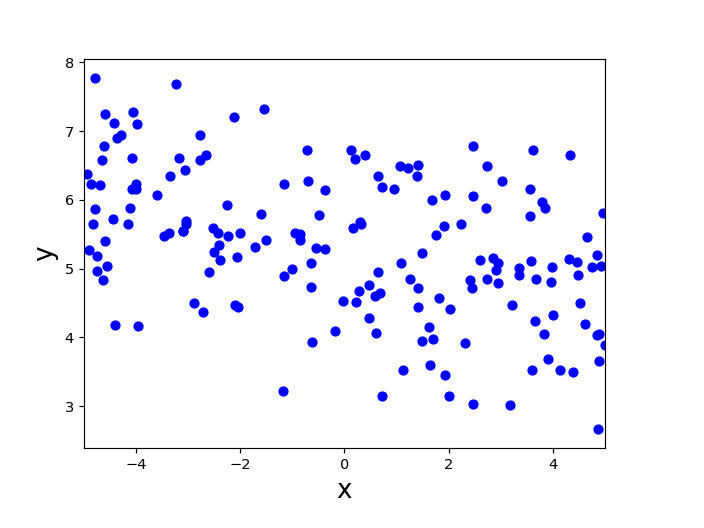

In [65]:
# 不要修改这里！
%matplotlib notebook
from helper import *

X,Y = generatePoints2D(seed)
vs_scatter_2d(X, Y)

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

<IPython.core.display.Javascript object>


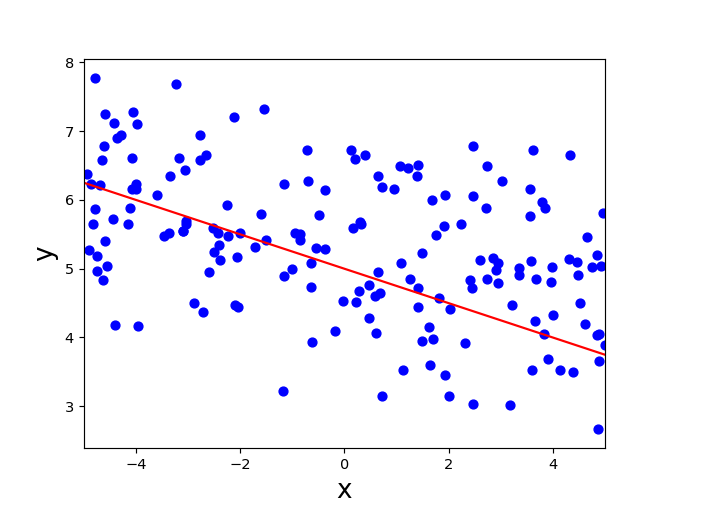

In [66]:
#TODO 请选择最适合的直线 y = mx + b
m1 = -0.25
b1 = 5.

# 不要修改这里！
vs_scatter_2d(X, Y, m1, b1)

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [67]:
# TODO 实现以下函数并输出所选直线的MSE
def calculateMSE2D(X,Y,m,b):
    l = [(y-m*x-b)*(y-m*x-b) for x,y in zip(X,Y)]
    mse = sum(l)/len(X)
    return mse

# TODO 检查这里的结果, 如果你上面猜测的直线准确, 这里的输出会在1.5以内
print(calculateMSE2D(X,Y,m1,b1))

1.088660244671405


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [68]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：线性回归的系数(如上面所说的 m, b)
'''
def linearRegression2D(X,Y):
    X = [[x, 1] for x in X]
    Y = [[y] for y in Y]
    XT = transpose(X)
    A = matxMultiply(XT, X)
    b = matxMultiply(XT, Y)
    result_list = gj_Solve(A, b)
    return result_list[0][0], result_list[1][0]
    return 0.,0.

In [69]:
# 请不要修改下面的代码
m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

[[-0.15008403679913862], [5.330001998053207]]
-0.15008403679913862 5.330001998053207


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

<IPython.core.display.Javascript object>


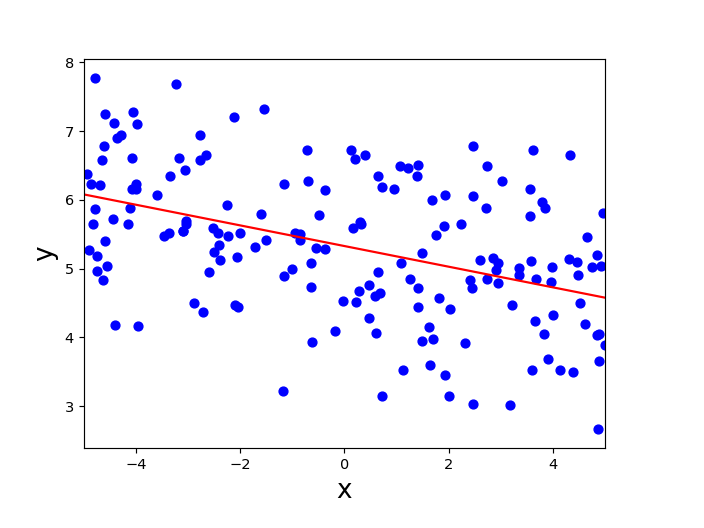

0.8822206367569035


In [70]:
## 请不要修改下面的代码
vs_scatter_2d(X, Y, m2, b2)
print(calculateMSE2D(X,Y,m2,b2))

## Bonus !!!
如果你的高斯约当消元法通过了单元测试, 那么它将能够解决多维的回归问题  
你将会在更高维度考验你的线性回归实现

<IPython.core.display.Javascript object>


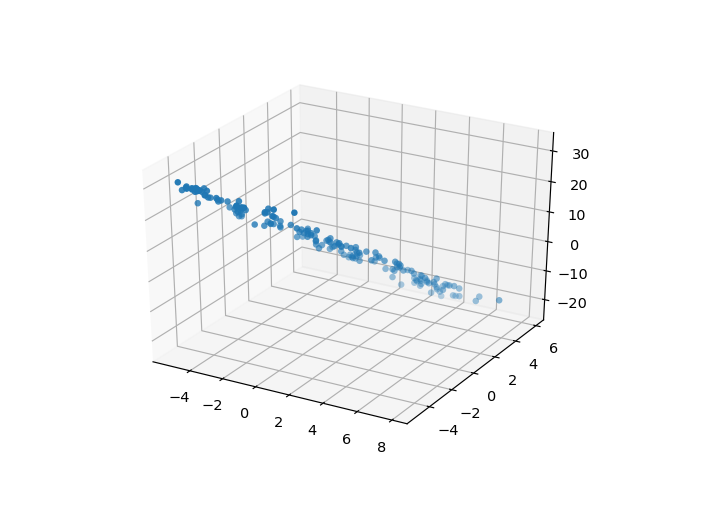

In [71]:
# 生成三维的数据点

X_3d, Y_3d = generatePoints3D(seed)
vs_scatter_3d(X_3d, Y_3d)

你的线性回归是否能够对付三维的情况?

In [72]:
def linearRegression(X,Y):
    return None

<IPython.core.display.Javascript object>


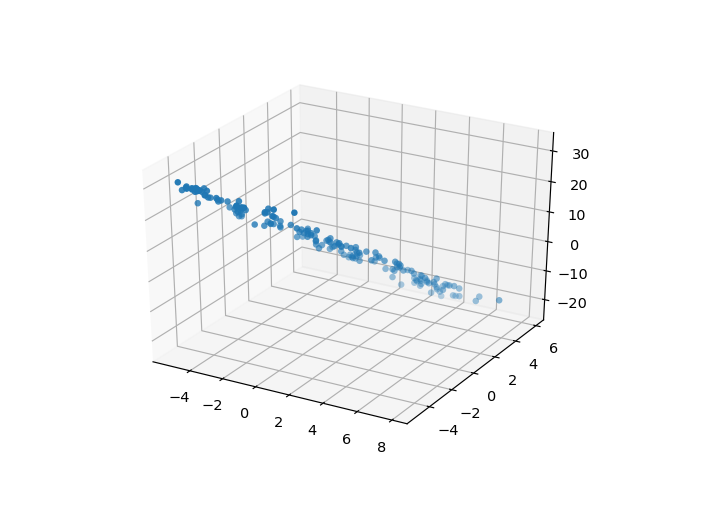

In [73]:
coeff = linearRegression(X_3d, Y_3d)
vs_scatter_3d(X_3d, Y_3d, coeff)